Exercise 1

In this exercise you should implement everything including the
tests (e.g. the chi-square and KS tests) yourself. Later, when your
code is working you are free to use builtin functions.

1. Write a program implementing a linear congruential generator
(LCG). Be sure that the program works correctly using only
integer representation.

(a) Generate 10.000 (pseudo-) random numbers and present
these numbers in a histogramme (e.g. 10 classes).

(b) Evaluate the quality of the generator by graphical
descriptive statistics (histogrammes, scatter plots) and
statistical tests - χ
2
,Kolmogorov-Smirnov, run-tests, and
correlation test.

(c) Repeat (a) and (b) by experimenting with different values
of “a”, “b” and “M”. In the end you should have a decent
generator. Report at least one bad and your final choice.

2. Apply a system available generator and perform the various
statistical tests you did under Part 1 point (b) for this
generator too.

3. You were asked to simulate one sample and perform tests on
this sample. Discuss the sufficiency of this approach and take
action, if needed.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import chi2
import scipy.stats as stats


In [4]:
#![image-2.png](attachment:image-2.png)

# 1

# a)

In [47]:
def random_num (n,x_0,a,c,m): 
    random_number = []
    for i in range(n):
        x_i = (x_0 * a + c)%m
        x_0 = x_i
        random_number.append(x_i/m)
    return random_number

In [81]:
U = random_num (10000,9,1111,113,2**24)
U2 = random_num (10000,3,100,20000,65530)

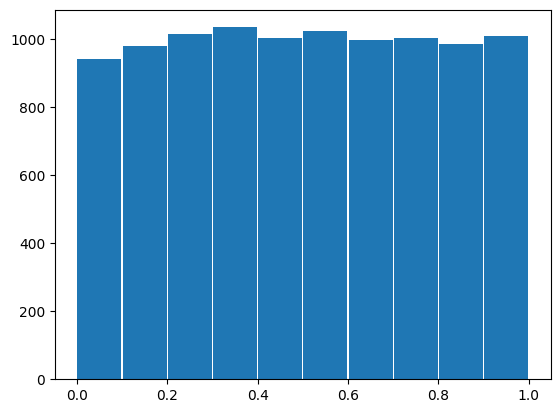

In [7]:
plt.hist(U, bins=10, rwidth=0.975)
plt.show()

In [8]:
#plt.hist(U, bins=10, rwidth=0.975)
#plt.show()

# b) 

Histogram and scatter plot

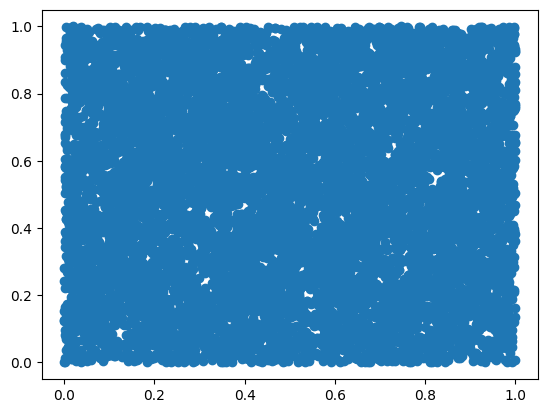

In [11]:
plt.scatter(U[:-1], U[1:])
plt.show()

# chi-square test


In [33]:
#X2 test

def chisquare(obs, no_class):
    Observed, bins = np.histogram(obs, bins= no_class)
    expct =  len(obs)/no_class
    T = 0
    for i in Observed:
        xx = ((i-expct)**2)/expct
        T+= xx
    p = chi2.pdf(T,9)
    print('chisquare p-value is:',p)
    if(p <= 0.05):
        print('The generated random numbers are not uniformly distributed')
    else:
        print('The generated random numbers are uniformly distributed')


In [34]:
chisquare(U, 10)

chisquare p-value is: 0.09991585517170648
The generated random numbers are uniformly distributed


# Kolmogorov-Smirnov

In [14]:

def KStest(random_num):
    data_sorted = np.sort(random_num)
    fo = data_sorted
    N = len(random_num)
    f = np.cumsum(data_sorted)
    fr =f/f[-1] 
    D = np.max(np.abs(fo - fr))
    ks_calculated_score = (math.sqrt(N) + 0.12 + 0.11/ math.sqrt(N)) * D
    print('Kolmogrov-Smirnov score T:', ks_calculated_score)
    ks_sig = 1.358 # 
    if(ks_calculated_score < ks_sig):
        print('The generated random numbers are uniformly distributed')
    else:
        print('The generated random numbers are not uniformly distributed')

In [15]:
KStest(U)

Kolmogrov-Smirnov score T: 25.037327681314157
The generated random numbers are not uniformly distributed


# Independence Test 
Run-tests I


In [35]:
#Independence Test

def Run_Test_I(random_num):
    N = len(random_num)
    med_rand_numbers = np.median(random_num)
    run_vec = ['D' if x < med_rand_numbers else 'U' for x in random_num]
    
    run_number = 0
    k = 1
    while(k <= len(run_vec)):
        j = k
        while(j < len(run_vec)):
            if(run_vec[j-1] == run_vec[j]):
                j = j + 1
                if(j == len(run_vec)):
                    run_number = run_number + 1
            else:
                run_number = run_number + 1
                break
        #end of inner while
        k = j + 1
        if(k == len(run_vec)):
            run_number = run_number + 1
    ## end of while\
    n1 = run_vec.count('U')
    n2 = run_vec.count('D')
    R_hat = (2 *n1 * n2)/ (n1 + n2) + 1
    S_R_squ = (2 * n1 * n2) * (2 * n1 * n2 - n1 - n2)/((n1 + n2)**2 * (n1 + n2 - 1))
    Z_ts = (run_number - R_hat)/math.sqrt(S_R_squ)
    print('Run_Test_I p-value is: ', abs(Z_ts))
    ### for alpha = 0.05 Z_st = 1.96
    if(abs(Z_ts) < 1.96):
        print('Failed to reject Ho')
        print('The generated random numbers are independent')
    else:
        print('Reject H0, and H1 is true')
        print('The generated random numbers are not independent')
        

In [36]:
Run_Test_I(U)

Run_Test_I p-value is:  0.9600480084015002
Failed to reject Ho
The generated random numbers are independent


In [21]:
def compute_run_lengths(s):
    length = 1
    lengths = np.empty( 0 , dtype = 'int' )
    for i in range(len(s)-1):
        if (s[i]>s[i+1]):
            lengths= np.append(lengths,length)
            length=1
        else:
            length+=1
    lengths= np.append(lengths,length)
    lengths[lengths > 6] = 6
    unique, counts = np.unique(lengths, return_counts=True)
    return unique, counts


In [37]:
def Run_Test_II(sample):
    N = len(sample)
    unique , counts = compute_run_lengths(sample)
    
    
    R = np.asarray([counts])

    A = np.array([[4529.4, 9044.9, 13568, 18091, 22615, 27892],
              [9044.9, 18097, 27139, 36187, 45234, 55789],
              [13568, 27139, 40721, 54281, 67852, 83685],
              [18091, 36187, 54281, 72414, 90470, 111580],
              [22615, 45234, 67852, 90470, 113262, 139476],
              [27892, 55789, 83685, 111580, 139476, 172860]])

    B = np.array([1/6, 5/24, 11/120, 19/720, 29/5040, 1/840]).T


    V = (1 / (N - 6)) * (R - N * B) @ A @ (R - N * B).T  
    p_RT2 = chi2.sf(V, 6)  # Using the upper tail of the chi-square distribution
    
    print('Run_Test_II p-value is: ', abs(p_RT2))
    ### for alpha = 0.05 Z_st = 1.96
    if(abs(p_RT2) < 1.96):
        print('Failed to reject Ho')
        print('The generated random numbers are independent')
    else:
        print('Reject H0, and H1 is true')
        print('The generated random numbers are not independent')
        

In [38]:
Run_Test_II(U)

Run_Test_II p-value is:  [[0.61258832]]
Failed to reject Ho
The generated random numbers are independent


# Correlation test

In [82]:
def correlation_test(U, h):
    n = len(U)
    score = sum([U[i]*U[i+h] for i in range(n-h)])/(n-h)
    
    return score

In [83]:
correlation_test(U,10)
#stats.norm.cdf(correlation_test(U,10),0.25,7/(144*len(U)))

0.2539096878552963

In [85]:
correlation_test(U,15)

0.25242248970718556

# Our comments:

A correlation test value of 0.2539096878552963 and 0.24547906601348443 indicates a weak positive correlation . Furthermore, it appears that as the value of "h" increases, the correlation becomes weaker.

This pattern suggests that there may be a positive relationship, but it is not very strong. As "h" increases, the strength of the correlation diminishes, indicating that the it may be less closely related at higher values of "h"

# 1c)

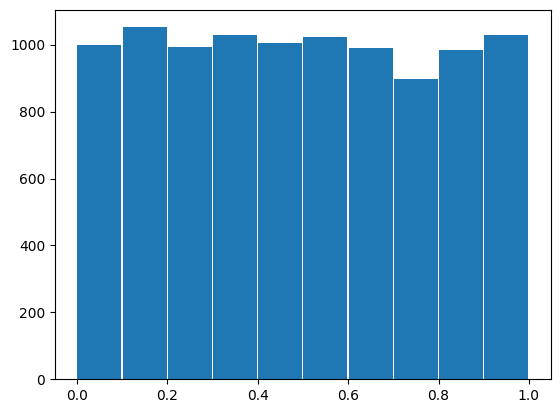

In [27]:
plt.hist(U2, bins=10, rwidth=0.975)
plt.show()

In [ ]:
plt.scatter(U2[:-1], s[1:])
plt.show()

In [28]:
chisquare(U2, 10)

p-value is: 0.02040558453414498
The generated random numbers are not uniformly distributed


In [29]:
KStest(U2)

Kolmogrov-Smirnov score T: 24.75295558364875
The generated random numbers are not uniformly distributed


In [30]:
Run_Test_I(U2)

p-value is:  3.6801840322057506
Reject H0, and H1 is true
The generated random numbers are not independent


In [31]:
Run_Test_II(U2)

p-value is:  [[0.2028728]]
Failed to reject Ho
The generated random numbers are independent


In [32]:
correlation_test(U2,15)

0.24547906601348443

In [70]:

c = [60, 80, 110]
D = []

for i in c:
    D.append(random_num(10000, 9, 1111, i, 2**24))


In [71]:
for i in range(0, 3):
    print("For c value of:", c[i])

    print(chisquare(D[i], 10))
    print(KStest(D[i]))
    print(Run_Test_I(D[i]))
    print(Run_Test_II(D[i]))
    print()
    

For c value of: 60
chisquare p-value is: 0.10410539667508087
The generated random numbers are uniformly distributed
None
Kolmogrov-Smirnov score T: 24.82979545240596
The generated random numbers are not uniformly distributed
None
Run_Test_I p-value is:  0.6800340059510627
Failed to reject Ho
The generated random numbers are independent
None
Run_Test_II p-value is:  [[0.94922076]]
Failed to reject Ho
The generated random numbers are independent
None

For c value of: 80
chisquare p-value is: 0.015097661354026713
The generated random numbers are not uniformly distributed
None
Kolmogrov-Smirnov score T: 24.191678277047632
The generated random numbers are not uniformly distributed
None
Run_Test_I p-value is:  1.6400820143525627
Failed to reject Ho
The generated random numbers are independent
None
Run_Test_II p-value is:  [[0.50870867]]
Failed to reject Ho
The generated random numbers are independent
None

For c value of: 110
chisquare p-value is: 0.019768686719776003
The generated random nu

In [76]:
m = [2**8, 2**10, 2**20]
D = []

for i in m:
    D.append(random_num(10000, 9, 1111, 110, i))

for i in range(0, 3):
    print("For m value of:", m[i])
    print(chisquare(D[i], 10))
    print(KStest(D[i]))
    print(Run_Test_I(D[i]))
    print()
    

For m value of: 256
chisquare p-value is: 2.547310243313633e-196
The generated random numbers are not uniformly distributed
None
Kolmogrov-Smirnov score T: 29.245177462428433
The generated random numbers are not uniformly distributed
None
Run_Test_I p-value is:  75.0037506563672
Reject H0, and H1 is true
The generated random numbers are not independent
None

For m value of: 1024
chisquare p-value is: 1.2618943647286068e-09
The generated random numbers are not uniformly distributed
None
Kolmogrov-Smirnov score T: 26.12342194075142
The generated random numbers are not uniformly distributed
None
Run_Test_I p-value is:  0.05615677755194204
Failed to reject Ho
The generated random numbers are independent
None

For m value of: 1048576
chisquare p-value is: 0.05810113316683119
The generated random numbers are uniformly distributed
None
Kolmogrov-Smirnov score T: 25.116241348839036
The generated random numbers are not uniformly distributed
None
Run_Test_I p-value is:  0.6800340059510627
Failed